In [3]:
import math
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sympy.abc import beta


In [4]:
import decimal
decimal.getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [51]:
c = 10e-9
r = 100
l = 1e-6

Is = 1e-8
Vs = 3.0
Vb = 2.0
Vt = .025
b  = 35

def ic(x2):
    ic = Is*(math.exp((Vb-x2)/Vt)-1)
    return ic

def f1(x1, x2, x3):
    f1 = (1/c)*(x3-ic(x2))
    return f1

def f2(x1, x2, x3):
    f2 = (1/c)*(ic(x2)/b+x3-x2/r)
    return f2

def f3(x1, x2, x3):
    f3 = (1/l)*(-x1-x2+Vs-x3*(r/100))
    return f3

In [52]:
#Halley's method
gamma = ((1/b+1)*r)/Vt
z1 = (gamma*Is*math.exp(Vb/Vt+Is*gamma))

def lambert(z): 
    x = range(500)
    w = 1
    for i in x:
        w = w - (w*math.exp(w) - z)/(math.exp(w)*(w+1)-((w+2)*(w*math.exp(w) - z))/(2*w+2))
    return w

w = lambert(z1)

Ic = w/gamma-Is
Ic

0.01597268598610171

In [53]:
#initial conditions
x20 = Ic*(1/b+1)*r
x10 = 3-x20
x30 = 0

In [54]:
print(x10, x20, x30)

1.3570951557152529 1.6429048442847471 0


In [55]:
def RK(t, h):

    f = [f1, f2, f3]
    k1 = [0,0,0]
    k2 = [0,0,0]
    k3 = [0,0,0]
    k4 = [0,0,0]
    
    x1 = [x10]
    x2 = [x20]
    x3 = [x30]

    p = 0
    q = 0
    for i in t:
        for j in f:
            k1[q] = j(x1[p], x2[p], x3[p])
            q+=1
        q = 0
        for j in f:
            k2[q] = j(x1[p]+(h/2)*k1[0], x2[p]+(h/2)*k1[1], x3[p]+(h/2)*k1[2])
            q+=1
        q = 0
        for j in f:
            k3[q] = j(x1[p]+(h/2)*k2[0], x2[p]+(h/2)*k2[1], x3[p]+(h/2)*k2[2])
            q+=1
        q = 0
        for j in f:
            k4[q] = j(x1[p]+h*k3[0], x2[p]+h*k3[1], x3[p]+h*k3[2])
            q+=1
        q = 0
        if p==len(t)-1: break
        
        x1.append(x1[p]+(h/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0]))
        x2.append(x2[p]+(h/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1]))
        x3.append(x3[p]+(h/6)*(k1[2]+2*k2[2]+2*k3[2]+k4[2]))
        
        p+=1
    return x1, x2, x3

In [10]:
### TEST
def f1(x, y, z):
    f1 = y
    return f1
def f2(x, y, z):
    f2 = -x
    return f2
def f3(x, y, z):
    f3 = 0
    return f3
x10 = 1
x20 = -10
x30 = 1
gah = RK()

TypeError: RK() missing 2 required positional arguments: 't' and 'h'

In [56]:
h=.0000000000025
t = np.arange(0, .00002, h)
gah = RK(t, h)

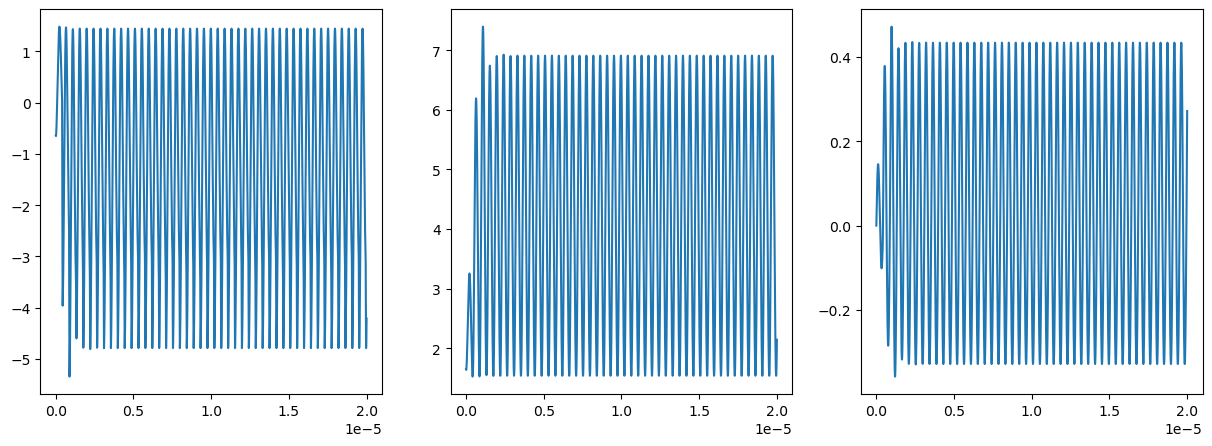

In [11]:
fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(1, 3, 1)
ax0.plot(t, gah[0])

ax1 = fig.add_subplot(1, 3, 2)
ax1.plot(t, gah[1])

ax2 = fig.add_subplot(1, 3, 3)
ax2.plot(t, gah[2])

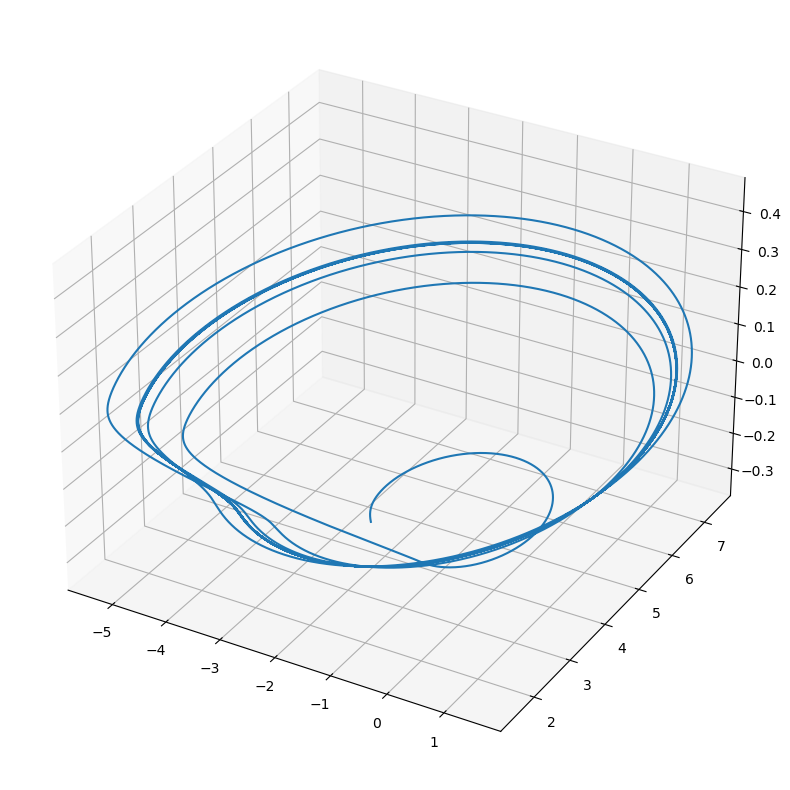

In [110]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot3D(gah[0], gah[1], gah[2])

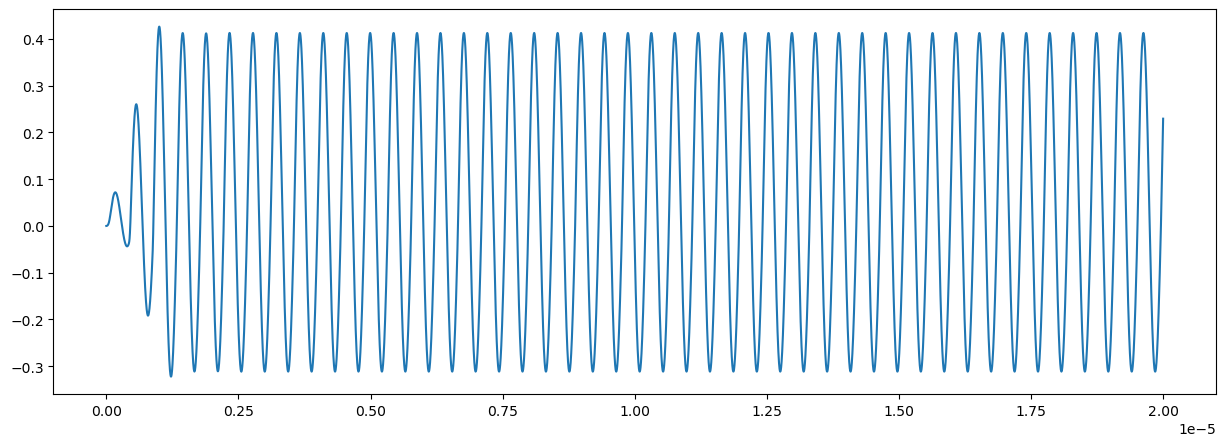

In [57]:
fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(1, 1, 1)
ax0.plot(t, gah[2])

In [58]:
p = int(.00002/h)
fft1 = np.fft.fft(gah[2],p)
print(fft1.min(), fft1.max())
p

(-36615.03287080112-23459.74920259269j) (318859.22273614374+1347568.1729446216j)


8000000

(0.0, 10000000.0)

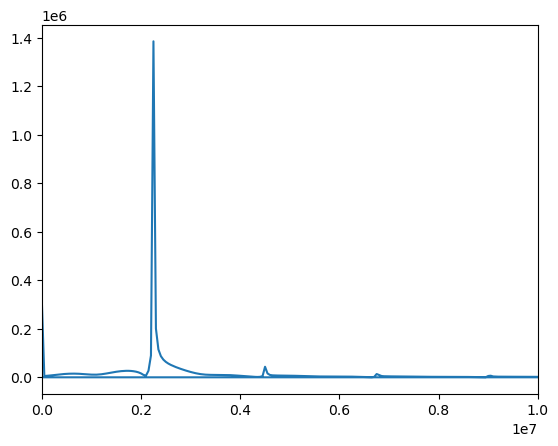

In [59]:
# p1 = int(p/2)+1
fftx = np.fft.fftfreq(len(fft1), h)
plt.plot(fftx, np.abs(fft1))
plt.xlim(0, 1e7)
plt.show()

In [60]:
idx = np.argmax(np.abs(fft1))
freq = fftx[idx]
freq

2250000.0000000005